In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine
%matplotlib inline

In [4]:
engine = create_engine('sqlite:///data/DisasterResponse.db')
df = pd.read_sql_table('DisasterResponse', engine)

In [5]:
genre_counts = df.groupby('genre').count()['message']
genre_names = list(genre_counts.index)

In [63]:
genre_counts

genre
direct    10615
news      13018
social     2356
Name: message, dtype: int64

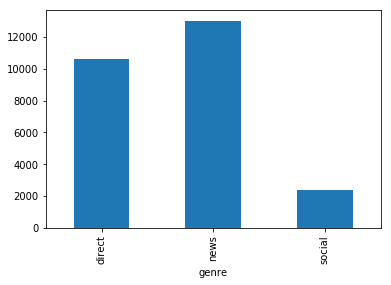

In [14]:
genre_counts.plot.bar();

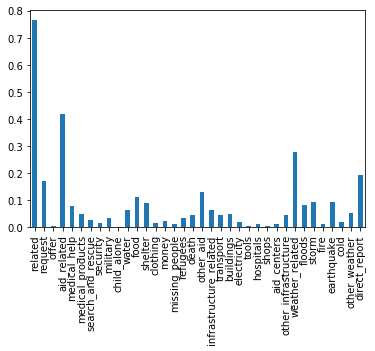

In [65]:
category_frequency = df.iloc[:,4:]
df.iloc[:,4:].mean().plot.bar();

In [72]:
category_frequency = df.iloc[:,4:].sum()
category_names = list(category_frequency.index)

In [73]:
category_names

['related',
 'request',
 'offer',
 'aid_related',
 'medical_help',
 'medical_products',
 'search_and_rescue',
 'security',
 'military',
 'child_alone',
 'water',
 'food',
 'shelter',
 'clothing',
 'money',
 'missing_people',
 'refugees',
 'death',
 'other_aid',
 'infrastructure_related',
 'transport',
 'buildings',
 'electricity',
 'tools',
 'hospitals',
 'shops',
 'aid_centers',
 'other_infrastructure',
 'weather_related',
 'floods',
 'storm',
 'fire',
 'earthquake',
 'cold',
 'other_weather',
 'direct_report',
 'Number of Classifications']

In [27]:
# distribution of multilabeling
nclassifications = df.iloc[:,4:].sum(axis=1)

In [39]:
np.unique(nclassifications)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 24., 27.])

In [49]:
df['Number of Classifications'] = pd.cut(nclassifications,bins=[0,1,2,3,4,5,10,15,20,30],right=False,labels=['0','1','2','3','4','5-9','10-14','15-19','>20'])

In [74]:
classification_counts = df.groupby('Number of Classifications').count()['message']
classification_names = list(classification_counts.index)

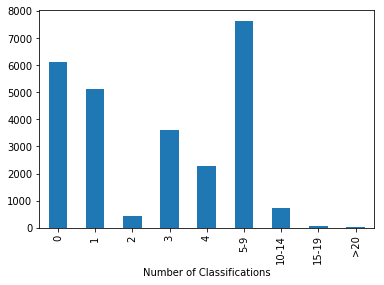

In [59]:
classification_counts.plot.bar();

In [78]:
list(classification_counts.index)

['0', '1', '2', '3', '4', '5-9', '10-14', '15-19', '>20']

In [81]:
list(classification_counts)

[6115, 5114, 443, 3603, 2273, 7647, 729, 52, 13]